In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# read data

df = pd.read_csv('weekly_sales.csv')
df

,Year,Week,Sales
0,2014,1,5.840965
1,2014,2,4.271083
2,2014,3,4.178649
3,2014,4,3.957609
4,2014,5,4.508701
...,...,...,...
569,2024,48,22.330502
570,2024,49,15.524499
571,2024,50,10.522981
572,2024,51,10.780693


In [3]:
# analyzed period

year_first = 2014 # first year in analyzed period
year_last = 2025 # last year in analyzed period

# analogous weeks of regular events from year_first to year_last

events_reg_analogous_list = {
    'SB1': [4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5], # analogous weeks of SUPER_BOWL-1week
    'SB': [5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6], # analogous weeks of SUPER_BOWL
    'EA': [16, 14, 12, 15, 13, 16, 15, 13, 15, 14, 13, 16], # analogous weeks of EASTER
    'MD1': [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21], # analogous weeks of MEMORIAL_DAY-1week
    'MD': [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22], # analogous weeks of MEMORIAL_DAY
    'ID1': [26, 26, 26, 26, 26, 26, 26, -25, 26, 26, 26, 26], # analogous weeks of INDEPENDENCE_DAY-1week (same week of AMAZON_DAY in 2021: mark as non-dominant event (minus sign))
    'ID': [27, 27, 27, 27, 27, 27, 27, 26, 27, 27, 27, 27], # analogous weeks of INDEPENDENCE_DAY 
    'AM': [29, 29, 28, 28, 29, 29, 42, 25, 28, 28, 29, 29], # analogous weeks of AMAZON_DAY (not in 2014: repeat corresponding week number of 2015; not in 2025: repeat corresponding week number of 2024)
    'LD1':[35, 36, 35, 35, 35, 35, 36, 35, 35, 35, 35, 35], # analogous weeks of LABOR_DAY-1week
    'LD': [36, 37, 36, 36, 36, 36, 37, 36, 36, 36, 36, 36], # analogous weeks of LABOR_DAY
    'BF3': [45, 45, 44, 44, 44, 45, 45, 44, 44, 44, 45, 45], # analogous weeks of BLACK_FRIDAY-3weeks
    'BF2': [46, 46, 45, 45, 45, 46, 46, 45, 45, 45, 46, 46], # analogous weeks of BLACK_FRIDAY-2weeks
    'BF1': [47, 47, 46, 46, 46, 47, 47, 46, 46, 46, 47, 47], # analogous weeks of BLACK_FRIDAY-1week
    'BF': [48, 48, 47, 47, 47, 48, 48, 47, 47, 47, 48, 48], # analogous weeks of BLACK_FRIDAY
    'CM': [49, 49, 48, 48, 48, 49, 49, 48, 48, 48, 49, 49], # analogous weeks of CYBER_MONDAY
    'XM2': [50, 50, 49, 50, 50, 50, 50, 49, 49, 50, 50, 50], # analogous weeks of CHRISTMAS-2weeks
    'XM1': [51, 51, 50, 51, 51, 51, 51, 50, 50, 51, 51, 51], # analogous weeks of CHRISTMAS-1week
    'XM': [52, 52, 51, 52, 52, 52, 52, 51, 51, 52, 52, 52], # analogous weeks of CHRISTMAS
}

events_reg_analogous = np.array(list(events_reg_analogous_list.values())) # matrix with analogous weeks of regular events

# analogous weeks of irregular events from year_first to year_last 

events_irreg_list = {
    'CE1_2021': [2021, 11], # COVID_EIP_1_2021: assume analogous to MEMORIAL_DAY-1week
    'CE2_2021': [2021, 12], # COVID_EIP_2_2021: assume analogous to MEMORIAL_DAY
    'AM2_2021': [2021, 41], # AMAZON_DAY_2_2021 (Black Friday-Worthy Deals): assume analogous to AMAZON_DAY_2_2023, AMAZON_DAY_2_2022 and AMAZON_DAY
    'EBF_2021': [2021, 42], # EARLY_BLACK_FRIDAY_2021 (Best Buy Early Black Friday Deals): assume analogous to AMAZON_DAY_2_2023, AMAZON_DAY_2_2022 and AMAZON_DAY
    'AM2_2022': [2022, 41], # AMAZON_DAY_2_2022 (Prime Early Access Savings): assume analogous to AMAZON_DAY_2_2023, EARLY_BLACK_FRIDAY_1_2021 and AMAZON_DAY
    'AM2_2023': [2023, 41], # AMAZON_DAY_2_2023 (Prime Big Deals Days): assume analogous to AMAZON_DAY_2_2022, AMAZON_DAY_2_2021 and AMAZON_DAY
    'AM2_2024': [2024, 41], # AMAZON_DAY_2_2024 (Prime Big Deals Days): assume analogous to AMAZON_DAY_2_2023, AMAZON_DAY_2_2022, AMAZON_DAY_2_2021 and AMAZON_DAY
}

events_irreg = np.array(list(events_irreg_list.values())) # matrix with all irregular events

events_irreg_analogous_list = {
    'CE1_2021': [21, 21, 21, 21, 21, 21, 21, 11, 21, 21, 21, 21], # analogous weeks of COVID_EIP_1_2021
    'CE2_2021': [22, 22 ,22, 22, 22, 22, 22, 12, 22, 22, 22, 22], # analogous weeks of COVID_EIP_2_2021
    'AM2_2021': [29, 29 ,28, 28, 29, 29, 42, 41, 41, 41, 41, 41], # analogous weeks of AMAZON_DAY_2_2021
    'EBF_2021': [29, 29, 28, 28, 29, 29, 42, 42, 41, 41, 41, 41], # analogous weeks of EARLY_BLACK_FRIDAY_2021
    'AM2_2022': [29, 29, 28, 28, 29, 29, 42, 41, 41, 41, 41, 41], # analogous weeks of AMAZON_DAY_2_2022
    'AM2_2023': [29, 29, 28, 28, 29, 29, 42, 41, 41, 41, 41, 41], # analogous weeks of AMAZON_DAY_2_2023
    'AM2_2024': [29, 29, 28, 28, 29, 29, 42, 41, 41, 41, 41, 41], # analogous weeks of AMAZON_DAY_2_2024
}

events_irreg_analogous = np.array(list(events_irreg_analogous_list.values())) # matrix with analogous weeks of irregular events

# analogous weeks of gap weeks from year_first to year_last (week in between CYBER_MONDAY and CHRISTMAS-2weeks: assume analogous to CHRISTMAS-2weeks)

gap_weeks_list = {
    'GAP_2017': [2017, 49], # gap week in 2017
    'GAP_2018': [2018, 49], # gap week in 2018
    'GAP_2023': [2023, 49], # gap week in 2023
}

gap_weeks = np.array(list(gap_weeks_list.values())) # matrix with gap weeks

gap_weeks_analogous = np.array([50, 50, 49, 49, 49, 50, 50, 49, 49, 49, 50, 50]) # analogous weeks of gap weeks

# analogous weeks of last weeks from year_first to year_last (last week of year without CHRISTMAS: assume analogous to CHRISTMAS)

last_weeks_list = {
    'LAST_2015': [2015, 53], # last week in 2015
    'LAST_2016': [2016, 52], # last week in 2016
    'LAST_2020': [2020, 53], # last week in 2020
    'LAST_2021': [2021, 52], # last week in 2021
    'LAST_2022': [2022, 52], # last week in 2022
}

last_weeks = np.array(list(last_weeks_list.values())) # matrix with last weeks

last_weeks_analogous = np.array([52, 53, 52, 52, 52, 52, 53, 52, 52, 52, 52, 52]) #  analogous weeks of last weeks

# known outlier weeks from year_first to year_last

outliers_weeks_list = {
    'OUT1': [2020, 1], # stock-out
    'COV1': [2020, 12], # covid
    'COV2': [2020, 13], # covid
    'COV3': [2020, 14], # covid
    'COV4': [2020, 15], # covid
}

outlier_weeks = np.array(list(outliers_weeks_list.values())) # matrix with known outlier weeks

In [4]:
# set chronological vector of weeks (ISO weeks: ISO 8601)

day_first = dt.date(year_first, 1, 1) # first day in analyzed period
day_last = dt.date(year_last, 12, 31) # last day in analyzed period

offset = (3 - day_first.weekday()) % 7  # thursday =3
first_thursday = day_first + dt.timedelta(days=offset) # find first thursday on or after day_first

thursdays = [] # list of all Thursdays

day = first_thursday
while day <= day_last:
    thursdays.append(day)
    day += dt.timedelta(weeks=1)

week_id = np.array([[d.isocalendar()[0], d.isocalendar()[1]] for d in thursdays]) # ISO year and week from each thursday

In [5]:
# data boundaries indices

year_data_first, week_data_first = df.iloc[0][['Year', 'Week']].astype(int) # first year and week in data
year_data_last, week_data_last = df.iloc[-1][['Year', 'Week']].astype(int) # last year and week in data

index_data_first = np.where((week_id[:, 0] == year_data_first) & (week_id[:, 1] == week_data_first))[0][0] # week_id index of first entry in data
index_data_last = np.where((week_id[:, 0] == year_data_last) & (week_id[:, 1] == week_data_last))[0][0] # week_id index of lastt entry in data

In [6]:
# set sales vector

sales = np.full(len(week_id), np.nan) # weekly sales
sales[index_data_first:index_data_last + 1] = df['Sales'].values

sales_log = np.where(sales > 0, np.log(sales), np.nan) # weekly log sales

In [7]:
# set matrices of indicators of events

ind_events_reg = np.zeros((len(events_reg_analogous), len(week_id)), dtype = int) # indicator of regular event
ind_events_irreg = np.zeros(len(week_id), dtype = int) # indicator of irregular event
ind_gap_weeks = np.zeros(len(week_id), dtype = int) # indicator of gap weeks
ind_last_weeks = np.zeros(len(week_id), dtype = int) # indicator of last weeks
ind_outlier_weeks = np.zeros(len(week_id), dtype = int) # indicator of known outlier weeks

# set matrix of indicators of regular events

for i_event, event_weeks in enumerate(events_reg_analogous): # for each regular event

    for i_year, week_in_year in enumerate(event_weeks): # for each year

        week_id_event = np.where((week_id[:, 0] == year_first + i_year) & (week_id[:, 1] == abs(week_in_year)))[0][0] # week_id index of week with event
        ind_events_reg[i_event, week_id_event] = int(week_in_year / abs(week_in_year)) # indicator of regular event (if non-dominant event: -1)

# set matrix of indicators of irregular events

for year, week in events_irreg: # for each irregular event

    week_id_event = np.where((week_id[:, 0] == year) & (week_id[:, 1] == abs(week)))[0][0] # week_id index of week with event
    ind_events_irreg[week_id_event] = 1 # indicator of irregular event

# set matrix of indicators of gap weeks

for year, week in gap_weeks: # for each gap week

    week_id_gap = np.where((week_id[:, 0] == year) & (week_id[:, 1] == abs(week)))[0][0] # week_id index of week with event
    ind_gap_weeks[week_id_gap] = 1 # indicator of gap week

# set matrix of indicators of last weeks

for year, week in last_weeks: # for each last week

    week_id_last = np.where((week_id[:, 0] == year) & (week_id[:, 1] == abs(week)))[0][0] # week_id index of week with event
    ind_last_weeks[week_id_last] = 1 # indicator of last week    

# set matrix of indicators of outlier weeks

for year, week in outlier_weeks: # for each outlier week

    week_id_outlier = np.where((week_id[:, 0] == year) & (week_id[:, 1] == abs(week)))[0][0] # week_id index of week with event
    ind_outlier_weeks[week_id_outlier] = 1 # indicator of outlier week       

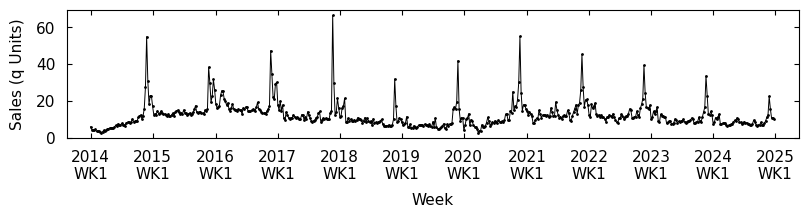

In [8]:
# plot sales

fig, ax = plt.subplots(figsize=(24/2.54, 4.25/2.54))

ax.tick_params(which='both', direction='in', pad=8, bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.set_xlabel('Week', labelpad=8, fontsize=11)
ax.set_ylabel('Sales (q Units)', labelpad=8, fontsize=11)

xticks_index = np.where(week_id[:, 1] == 1)[0] # index for xticks (WK1)
xticks_label = [f"{year}\nWK1" for year in range(year_first, year_last + 1)]

ax.set_xticks(xticks_index)
ax.set_xticklabels(xticks_label)

ax.set_xlim(xticks_index[0] - 20, xticks_index[-1] + 20)

ax.plot(range(len(sales)), sales, linestyle='-', linewidth=0.7, marker='o', markersize=1, color='black')

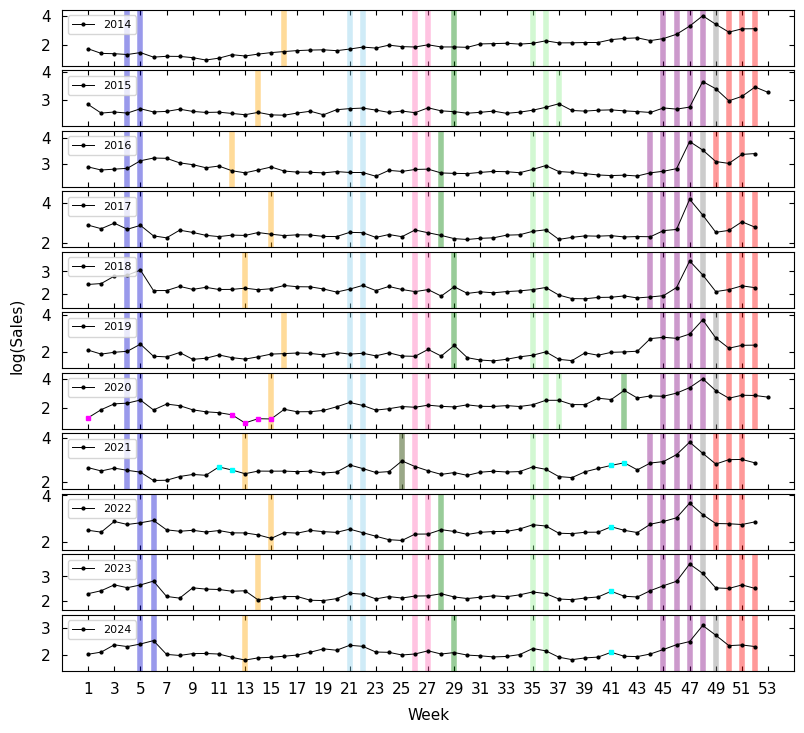

In [9]:
# plot sales by year and events

fig, axs = plt.subplots(nrows=year_last-year_first, ncols=1, figsize=(24/2.54, 21.8/2.54), sharex=False)
fig.subplots_adjust(wspace=0.08, hspace=0.08)
fig.supylabel('log(Sales)', x=0.07, fontsize=11)

event_colors = [
    'mediumblue','mediumblue','orange','skyblue','skyblue','hotpink','hotpink','green',
    'lightgreen','lightgreen','purple','purple','purple','purple','gray','red','red','red'
] # colors for regular events

for i_year, year in enumerate(range(year_first, year_last)):

    ax = axs[i_year]

    ax.tick_params(which='both', direction='in', pad=8, bottom=True, top=True, left=True, right=True)
    ax.tick_params(axis='x', labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

    if year == year_last - 1:
        ax.set_xlabel('Week', labelpad=8, fontsize=11)

    xlim_min = np.where((week_id[:, 0] == year) & (week_id[:, 1] == 1))[0][0] # first week in year
    xlim_max = np.where((week_id[:, 0] == year) & (np.isin(week_id[:, 1], [52, 53])))[0][-1] # last week in year (52 or 53 weeks)

    ax.set_xticks(range(xlim_min, xlim_min + 53, 2))
    ax.set_xticklabels(range(1, 54, 2))

    xlim_offset = 2 if xlim_max - xlim_min + 1 == 53 else 3
    ax.set_xlim(xlim_min - 2, xlim_max + xlim_offset)

    y_sales = sales_log[xlim_min:xlim_max+1]
    ax.set_ylim(min(y_sales) - 0.4, max(y_sales) + 0.4)

    for i_event, event in enumerate(ind_events_reg): # highlight regular events
        week_events_reg = np.where(event[xlim_min:xlim_max + 1] != 0)[0][0] + xlim_min # week with regular event i_event
        ax.axvline(x=week_events_reg, linewidth=4, alpha=0.4, color=event_colors[i_event])  # highlight regular events

    ax.plot(range(xlim_min, xlim_max + 1), y_sales, linestyle='-', linewidth=0.7, marker='o', markersize=2, color='black', label=str(year)) # plot log sales

    week_events_irreg = np.where(ind_events_irreg == 1)[0] # weeks with irregular events
    ax.plot(week_events_irreg, sales_log[week_events_irreg], linestyle=' ', marker='s', markersize=2.5, color='cyan')

    week_out = np.where(ind_outlier_weeks == 1)[0] # weeks with outliers
    if year == 2020:
        ax.plot(week_out, sales_log[week_out], linestyle=' ', marker='s', markersize=2.5, color='magenta')
    
    ax.legend(loc='upper left', fontsize=8, labelspacing=0.1)

In [10]:
# define function to return analogous weeks of a target week

def analogous_weeks(week_target): # find set of analogous weeks of week_target (week_id indices)

    year_t, week_t = week_id[week_target] # year and week of target week

    if np.any(ind_events_reg[:, week_target]): # if regular event

        i_event = np.where(ind_events_reg[:, week_target] == 1)[0][0] # identify regular event (dominant event)
        
        analogous = np.where(ind_events_reg[i_event] != 0)[0] # set of weeks with same regular event
        analogous[ind_events_reg[i_event, analogous] < 0] += 1 # only for INDEPENDENCE_DAY-1week -> INDEPENDENCE_DAY (needs adjustment if other non-dominant event)

    elif ind_events_irreg[week_target]: # if irregular event

        i_event = np.where((events_irreg[:, 0] == year_t) & (events_irreg[:, 1] == week_t))[0][0] # identify irregular event

        analogous = np.array([
            np.where((week_id[:, 0] == year) & (week_id[:, 1] == events_irreg_analogous[i_event][year - year_first]))[0][0]
            for year in range(year_first, year_last + 1)
        ]) # set of weeks with analogous events

    elif ind_gap_weeks[week_target]: # if gap week

        analogous = np.array([
            np.where((week_id[:, 0] == year) & (week_id[:, 1] == gap_weeks_analogous[year - year_first]))[0][0]
            for year in range(year_first, year_last + 1)
        ]) # set of weeks analogous to gap weeks

    elif ind_last_weeks[week_target]: # if last week

        analogous = np.array([
            np.where((week_id[:, 0] == year) & (week_id[:, 1] == last_weeks_analogous[year - year_first]))[0][0]
            for year in range(year_first, year_last + 1)
        ]) # set of weeks analogous to last weeks

    else: # if ordinary week

        analogous = []
        for year in range(year_first, year_last + 1):

            week = np.where((week_id[:, 0] == year) & (week_id[:, 1] == week_t))[0][0] # week with same number in year

            if not (ind_events_reg[:, week].any() or ind_events_irreg[week] 
                    or ind_gap_weeks[week] or ind_last_weeks[week]): # if week is ordinary
                analogous.append(week)

            else: # if week is not ordinary

                def find_next_ordinary(week_start, direction): # find next ordinary week in past or future
                    i = 1
                    while True:
                        week_next = week_start + i * direction
                        if not (ind_events_reg[:, week_next].any() or ind_events_irreg[week_next]
                                or ind_gap_weeks[week_next] or ind_last_weeks[week_next]):
                            return week_next
                        i += 1

                week_past = find_next_ordinary(week, -1) # nearest ordinary week in past
                week_future = find_next_ordinary(week, 1) # nearest ordinary week in future

                analogous.append(week_past if (week - week_past <= week_future - week) else week_future) # select nearest ordinary week

        analogous = np.array(analogous) # convert list into array

    return analogous

In [11]:
# define function for time series decomposition

def decomp(series, week_start, week_end, l, ind_outliers, mat=False, it=False, tol=1e-10): # estimate trend-cycle and seasonal-stochastic components of series for week_start+l <= t <= week_end-l (week_id indices)

    if it : # iteration approach

        def wls(x_vals, y_vals, weights): # weighted least squares: y_vals = b0 + b1 * x_vals
            m = np.vstack((np.ones(len(x_vals)), x_vals)).T
            b = np.linalg.lstsq(m * np.sqrt(weights[:, None]), y_vals * np.sqrt(weights), rcond=None)[0]
            return b[1], b[0] # slope and intercept
        
        def get_trendcycle(x_series): # get trend-cycle component in iteration approach
            x_trendcycle = np.full(len(x_series), np.nan) # trend-cycle component
            for week in range(week_start + l, week_end - l + 1):
                weights = np.where(ind_outliers[week - l:week + l + 1], 0, 1) # weights=0 for outliers 
                slope, intercept = wls(np.arange(week - l, week + l + 1), x_series[week - l:week + l + 1], weights) # coefficients from WLS
                x_trendcycle[week] = slope * week + intercept # linear approximation of x_series at week
            return x_trendcycle

        def get_seasonal_ave(s_series): # get average of seasonal-stochastic component of analogous weeks in iteration approach
            s_ave = np.full(len(s_series), np.nan) # average of seasonal-stochastic component of analogous weeks
            for week in range(week_start, week_end + 1):
                analogous_set = analogous_weeks(week) # set of analogous weeks
                seasonal_set = [s_series[w] for w in analogous_set] # seasonal-stochastic component of analogous weeks
                s_ave[week] = np.nanmean(seasonal_set)
            return s_ave

        x = np.full(len(series), np.nan) # series to be decomposed
        x[week_start:week_end + 1] = series[week_start:week_end + 1] # only values of series between week_start and week_end
        
        # initial estimation
        
        trendcycle = get_trendcycle(x) # initia trend-cycle component
        seasonal = x - trendcycle # initial seasonal-stochastic component
        seasonal[ind_outliers == 1] = np.nan # mask outliers
        seasonal_ave = get_seasonal_ave(seasonal) # average of seasonal-stochastic component of analogous weeks
        x_adjusted = x - (seasonal_ave - np.nanmean(seasonal_ave)) # initial seasonally adjusted x

        # iterative estimation
        
        diff = np.inf # difference between successive iterations
        while diff > tol: # iterate until diff is small enough

            trendcycle = get_trendcycle(x_adjusted) # iterative trend-cycle component
            seasonal = x - trendcycle # iterative seasonal-stochastic component
            seasonal[ind_outliers == 1] = np.nan # mask outliers
            seasonal_ave = get_seasonal_ave(seasonal) # average of seasonal-stochastic component of analogous weeks
        
            x_adjusted_old = x_adjusted.copy()
            x_adjusted = x - (seasonal_ave - np.nanmean(seasonal_ave)) # iterative seasonally adjusted x
            diff = np.nanmax(abs(x_adjusted - x_adjusted_old)) # update difference

        # final estimation
        
        trendcycle_final = np.full(len(x), np.nan) # final trend-cycle component
        slope_final = np.full(len(x), np.nan) # slope of trend-cycle component linear approximation
        
        for week in range(week_start + l, week_end - l + 1):
            
            weights = np.where(ind_outliers[week - l:week + l + 1], 0, 1) # weights=0 for outliers 
            slope, intercept = wls(np.arange(week - l, week + l + 1), x_adjusted[week - l:week + l + 1], weights) # coefficients from WLS
            
            trendcycle_final[week] = slope * week + intercept
            slope_final[week] = slope

        seasonal_final = x - trendcycle_final # final seasonal-stochastic component
        seasonal_final[ind_outliers == 1] = np.nan # mask outliers

        seasonal_ave_final = np.full(len(series), np.nan) # average of seasonal-stochastic component of analogous weeks
        seasonal_std_final = np.full(len(series), np.nan) # standard deviation of seasonal-stochastic component of analogous weeks
    
        for week in range(week_start, week_end + 1):
            
            analogous_set = analogous_weeks(week) # set of analogous weeks
            seasonal_set = [seasonal_final[w] for w in analogous_set] # seasonal-stochastic component of analogous weeks
    
            seasonal_ave_final[week] = np.nanmean(seasonal_set)
            seasonal_std_final[week] = np.nanstd(seasonal_set, ddof=1)
    
        return trendcycle_final, seasonal_final, seasonal_ave_final, seasonal_std_final, slope_final

    else: # matrix approach

        x = series[week_start:week_end + 1].copy() # series to be decomposed (only values of series between week_start and week_end)
    
        mu = np.zeros(len(x)) # for local linear regression in window
        nu = np.zeros(len(x)) # for local linear regression in window
        
        WL = np.zeros((len(x), len(x))) # matrix for trend-cycle component
        WA = np.zeros((len(x), len(x))) # matrix for seasonal adjustment
        I = np.identity(len(x)) # identity matrix

        window_UL = range(l, len(x) - l) # window U_l
        valid_window_UL = [w for w in window_UL if ind_outliers[w + week_start] == 0] # valid window U_l (outliers removed)
        len_valid_window_UL = len(valid_window_UL)

        for t in range(len(x)):

            window_L = range(max(0, t - l), min(len(x), t + l + 1)) # window L_t
            valid_window_L = [w for w in window_L if ind_outliers[w + week_start] == 0] # valid window L_t (outliers removed)
            len_valid_window_L = len(valid_window_L)
            
            mu[t] = np.mean(valid_window_L) # compute mu
            nu[t] = np.mean([(w - mu[t]) ** 2 for w in valid_window_L]) # compute nu

            for j in valid_window_L:
                WL[t][j] = (1 + (t - mu[t]) * (j - mu[t]) / nu[t]) / len_valid_window_L # compute WL matrix 

            analogous_set = analogous_weeks(t + week_start) - week_start # set of analogous weeks of week t
            analogous_valid = list(set(analogous_set) & set(valid_window_UL)) # analogous valid in window U_l
            len_analogous_valid = len(analogous_valid)

            for j in valid_window_UL:
                WA[t][j] = (int(j in analogous_set) / len_analogous_valid) - (1 / len_valid_window_UL) # compute WA matrix 

        x_adjusted = np.linalg.solve(I - WA @ WL, (I - WA) @ x) # seasonally adjusted x
        trendcycle = WL @ x_adjusted # trend-cycle component 
        seasonal = x - trendcycle # seasonal-stochastic component

        slope = np.zeros(len(x)) # slope of trend-cycle component linear approximation
        
        for t in range(len(x)):

            window_L = range(max(0, t - l), min(len(x), t + l + 1)) # window L_t
            valid_window_L = [w for w in window_L if ind_outliers[w + week_start] == 0] # valid window L_t (outliers removed)
            len_valid_window_L = len(valid_window_L)

            for j in valid_window_L:
                slope[t] += ((j - mu[t]) / nu[t]) * x_adjusted[j] / len_valid_window_L # compute slope of trend-cycle component linear approximation

        trendcycle_final = np.full(len(series), np.nan) # trend-cycle component (original length)
        seasonal_final = np.full(len(series), np.nan) # seasonal-stochastic component (original length)
        slope_final = np.full(len(series), np.nan) # slope of trend-cycle component linear approximation (original length)

        trendcycle_final[week_start + l:week_start + len(x) - l] = trendcycle[l:len(x) - l]
        seasonal_final[week_start + l:week_start + len(x) - l] = seasonal[l:len(x) - l]
        seasonal_final[ind_outliers == 1] = np.nan # mask outliers
        slope_final[week_start + l:week_start + len(x) - l] = slope[l:len(x) - l]

        seasonal_ave_final = np.full(len(series), np.nan) # average of seasonal-stochastic component of analogous weeks
        seasonal_std_final = np.full(len(series), np.nan) # standard deviation of seasonal-stochastic component of analogous weeks
    
        for week in range(week_start, week_end + 1):
            
            analogous_set = analogous_weeks(week) # set of analogous weeks
            seasonal_set = [seasonal_final[w] for w in analogous_set] # seasonal-stochastic component of analogous weeks
    
            seasonal_ave_final[week] = np.nanmean(seasonal_set)
            seasonal_std_final[week] = np.nanstd(seasonal_set, ddof=1)

        if mat:
            return trendcycle_final, seasonal_final, seasonal_ave_final, seasonal_std_final, slope_final, WL @ np.linalg.solve(I - WA @ WL, I - WA) # return matrix W
        else:
            return trendcycle_final, seasonal_final, seasonal_ave_final, seasonal_std_final, slope_final

In [12]:
# time series decomposition

l = 26 # length of moving window for decomposition is 2*l+1

week_start = np.where((week_id[:, 0] == 2014) & (week_id[:, 1] == 1))[0][0] # decompose from week_start
week_end = np.where((week_id[:, 0] == 2025) & (week_id[:, 1] == 1))[0][0] - 1 # decompose until week_end

ind_outliers = ind_outlier_weeks # correction for outliers

sales_decomp = decomp(sales_log, week_start, week_end, l, ind_outliers, mat=True) # decompose time series

trendcycle, seasonal, matrix_W = (
    sales_decomp[0],  # trend-cycle component
    sales_decomp[1],  # seasonal-stochastic component
    sales_decomp[5] # matrix W to obtain trend-cycle component
)

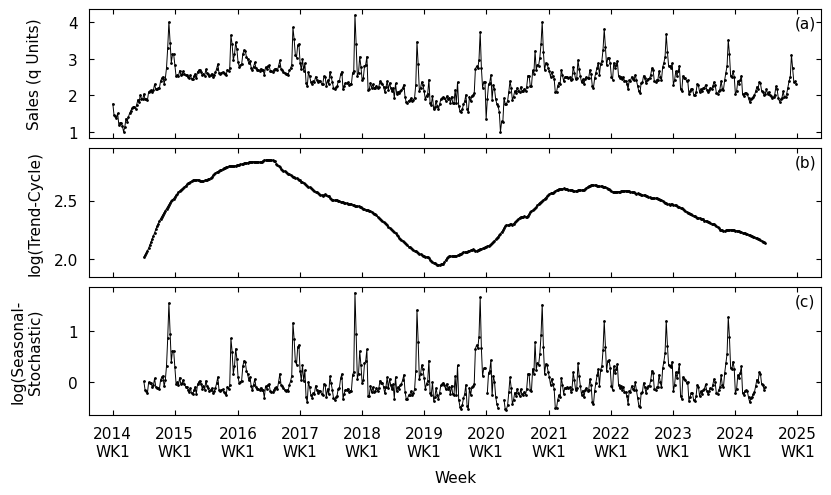

In [13]:
# plot decomposition

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(24/2.54, 13.4/2.54), sharex=True)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

xticks_index = np.where(week_id[:, 1] == 1)[0]  # index for xticks (WK1)
xticks_label = [f"{year}\nWK1" for year in range(year_first, year_last + 1)]
xlim = (xticks_index[0] - 20, xticks_index[-1] + 20)

ax = axs[0] # plot log sales

ax.tick_params(which='both', direction='in', pad=8, bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.tick_params(labelbottom=False)
ax.set_ylabel('Sales (q Units)', labelpad=8, fontsize=11)

ax.set_xticks(xticks_index)
ax.set_xticklabels(xticks_label)

ax.set_xlim(*xlim)

ax.plot(range(len(sales_log)), sales_log, linestyle='-', linewidth=0.7, marker='o', markersize=1, color='black')

ax = axs[1] # plot trend-cycle component

ax.tick_params(which='both', direction='in', pad=8, bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.tick_params(labelbottom=False)
ax.set_ylabel('log(Trend-Cycle)', labelpad=8, fontsize=11)

ax.set_xticks(xticks_index)
ax.set_xticklabels(xticks_label)

ax.set_xlim(*xlim)
ax.set_ylim(np.nanmin(trendcycle)-0.1,np.nanmax(trendcycle)+0.1)

ax.plot(range(len(trendcycle)), trendcycle, linestyle='-', linewidth=0.7, marker='o', markersize=1, color='black')

ax = axs[2] # plot seasonal-stochastic component

ax.tick_params(which='both', direction='in', pad=8, bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.set_xlabel('Week', labelpad=8, fontsize=11)
ax.set_ylabel('log(Seasonal-\nStochastic)', labelpad=8, fontsize=11)

ax.set_xticks(xticks_index)
ax.set_xticklabels(xticks_label)

ax.set_xlim(*xlim)

ax.plot(range(len(seasonal)), seasonal, linestyle='-', linewidth=0.7, marker='o', markersize=1, color='black')

fig.align_ylabels(axs)

for i, ax in enumerate(axs):
    label = f'({chr(97 + i)})' # 97 is 'a' in ASCII
    ax.text(
        0.964, 0.95, label,
        transform=ax.transAxes,
        fontsize=11,
        va='top', ha='left'
    )

Text(0.9, 0.875, '$(×10^{-5})$')

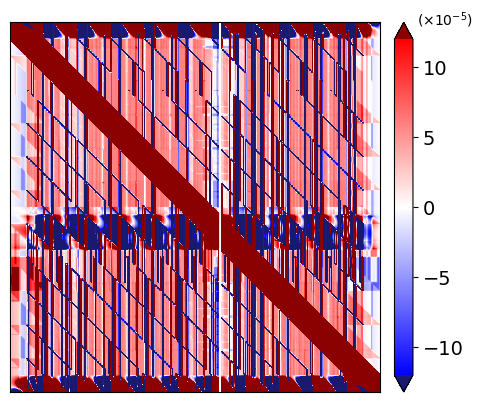

In [14]:
# plot matrix W

fig, ax = plt.subplots()

my_cmap = plt.colormaps.get('bwr')
my_cmap.set_over('darkred')
my_cmap.set_under('midnightblue')

cax = ax.imshow(matrix_W*1e5, vmin=-0.00012*1e5, vmax=0.00012*1e5, cmap=my_cmap) # plot matrix scaled by 1e5
ax.set_xticks([])
ax.set_yticks([])

cbar = fig.colorbar(cax, ax=ax, fraction=0.0462, pad=0.03, extend='both') # add colorbar
cbar.ax.tick_params(labelsize=14)
fig.text(0.9, 0.875, r'$(×10^{-5})$', fontsize=10)

In [15]:
# define function for forecasting of log sales

def sales_log_pred(series, week_start, week_end, l, ind_outliers, tau): # sales prediction in week_end + tau

    def ols3(x, y, z): # linear regression by ordinary least squares: z = b0 + b1*x + b2*y
        m = np.transpose(np.array([np.ones(len(x)), x, y]))
        b = np.linalg.lstsq(m, z, rcond=None)[0]
        return b

    x = np.full(len(series), np.nan) # series to be decomposed
    x[week_start:week_end + 1] = series[week_start:week_end + 1] # only values of series between week_start and week_end
    
    sales_decomp = decomp(sales_log, week_start, week_end, l, ind_outliers) # decompose time series

    trendcycle, seasonal, seasonal_zscore, beta = (
        sales_decomp[0],  # trend-cycle component
        sales_decomp[1],  # seasonal-stochastic component
        (sales_decomp[1] - sales_decomp[2]) / sales_decomp[3], # seasonal-stochastic component z-score
        sales_decomp[4] # slope of trend-cycle component linear approximation
    )

    # trend-cycle component forecast
       
    def trendcycle_prediciton(horizon): # forecast trend-cycle component

        trendcycle_now = trendcycle[week_start + l:week_end - 2 * l - horizon + 1]
        beta_now = beta[week_start + l:week_end - 2 * l - horizon + 1]
        trendcycle_fut = trendcycle[week_start + 2 * l + horizon:week_end - l + 1]

        b = ols3(trendcycle_now, beta_now, trendcycle_fut) # coefficients of linear regression

        t_pred = b[0] + b[1] * trendcycle[week_end - l] + b[2] * beta[week_end - l] # trend-cycle component forecast

        residuals = trendcycle_fut - (b[0] + b[1] * trendcycle_now + b[2] * beta_now)
        t_pred_std = np.sqrt(np.sum(residuals ** 2) / (len(residuals) - 3))  # trend-cycle component forecast standard deviation

        return t_pred, t_pred_std

    trendcycle_pred, trendcycle_pred_std = trendcycle_prediciton(tau) # trend-cycle component forecast and standard deviation
    trendcycle_end, trendcycle_end_std = trendcycle_prediciton(0) # trend-cycle component at last considered week and standard deviaiton  

    # seasonal-stochastic component forecast
    
    analogous_set = analogous_weeks(week_end) # set of analogous weeks of last considered week
    seasonal_set = [seasonal[w] for w in analogous_set] # seasonal-stochastic component of analogous weeks
    seasonal_ave_end = np.nanmean(seasonal_set) # average of seasonal-stochastic component
    seasonal_std_end = np.nanstd(seasonal_set, ddof=1) # standard deviation of seasonal-stochastic component
    seasonal_zscore_end = ((x[week_end] - trendcycle_end) - seasonal_ave_end) / seasonal_std_end # seasonal-stochastic component z-score of last considered week
    
    analogous_set = analogous_weeks(week_end + tau) # analogous weeks of target week to be forecasted
    seasonal_set = [seasonal[w] for w in analogous_set] # seasonal-stochastic component of analogous weeks
    seasonal_ave = np.nanmean(seasonal_set) # average of seasonal-stochastic component
    seasonal_std = np.nanstd(seasonal_set, ddof=1) # standard deviation of seasonal-stochastic component

    # AR(1) correction for seasonal-stochastic component forecast
    
    llambda = l # parameter for estimation of serial correlation in time series (set llambda=l)

    z = seasonal_zscore[week_end - l - (llambda - 1): week_end - l + 1]
    z_prev = seasonal_zscore[week_end - l - llambda: week_end - l]
    valid = ~np.isnan(z) & ~np.isnan(z_prev)
    phi = np.sum(z[valid] * z_prev[valid]) / np.sum(z[valid] ** 2) # AR(1) parameter phi
    
    theta_sq = np.sum((z[valid] - phi * z_prev[valid]) ** 2) / (np.sum(valid) - 1)
    theta = np.sqrt(theta_sq) # AR(1) parameter theta
    
    seasonal_pred = seasonal_ave + seasonal_std * seasonal_zscore_end * phi ** tau # seasonal-stochastic component forecast with AR(1) correction
    seasonal_pred_std = seasonal_std*np.sqrt(
        ((trendcycle_end_std ** 2) / (seasonal_std_end ** 2)) * (phi ** (2 * tau)) + 
        ((1 - (phi ** (2 * tau))) / (1 - phi ** 2)) * (theta ** 2)) # standard deviation for seasonal-stochastic component prediction 
    
    sales_pred = trendcycle_pred + seasonal_pred # log sales forecast
    sales_pred_std = np.sqrt(trendcycle_pred_std ** 2 + seasonal_pred_std ** 2) # standard deviation for log sales forecast
    
    return sales_pred, sales_pred_std

In [16]:
# sales forecasting backtest

tau = 1 # forecast horizon
l = 26 # length of moving window for decomposition is 2*l+1

week_start = np.where((week_id[:, 0] == 2014) & (week_id[:, 1] == 1))[0][0] # first week of available data
week_first_pred = np.where((week_id[:, 0] == 2021) & (week_id[:, 1] == 1))[0][0] - 1 # start forecasting backtest from week_first_pred + tau
week_last_pred = index_data_last - tau # end forecasting backtest at week_last_pred + tau

ind_outliers = ind_outlier_weeks # correction for outliers

sales_prediction = np.full(len(week_id), np.nan) # sales forecast
sales_prediction_upper1 = np.full(len(week_id), np.nan) # sales forecast + 1std (upper)
sales_prediction_lower1 = np.full(len(week_id), np.nan) # sales forecast + 1std (lower)
sales_prediction_upper2 = np.full(len(week_id), np.nan) # sales forecast + 2std (upper)
sales_prediction_lower2 = np.full(len(week_id), np.nan) # sales forecast + 2std (lower)
sales_prediction_upper3 = np.full(len(week_id), np.nan) # sales forecast + 3std (upper)
sales_prediction_lower3 = np.full(len(week_id), np.nan) # sales forecast + 3std (lower)

for week in range(week_first_pred, week_last_pred + 1):

    sales_pred, sales_pred_std = sales_log_pred(sales_log, week_start, week, l, ind_outliers, tau) # forecast for week + tau
    
    sales_prediction[week + tau] = np.exp(sales_pred)
    sales_prediction_upper1[week + tau] = np.exp(sales_pred + 1 * sales_pred_std)
    sales_prediction_lower1[week + tau] = np.exp(sales_pred - 1 * sales_pred_std)
    sales_prediction_upper2[week + tau] = np.exp(sales_pred + 2 * sales_pred_std)
    sales_prediction_lower2[week + tau] = np.exp(sales_pred - 2 * sales_pred_std)
    sales_prediction_upper3[week + tau] = np.exp(sales_pred + 3 * sales_pred_std)
    sales_prediction_lower3[week + tau] = np.exp(sales_pred - 3 * sales_pred_std)

In [17]:
# compute accuracy metrics

period = 53 # period for average errors

err = np.full(len(week_id), np.nan) # errors
ae = np.full(len(week_id), np.nan) # absolute errors
pe = np.full(len(week_id), np.nan) # percentage errors
se = np.full(len(week_id), np.nan) # for smape (sum of absolute prediction + actual)

mae = np.full(len(week_id), np.nan) # MAE: mean absolute errors
rmse = np.full(len(week_id), np.nan) # RMSE: root-mean-square errors
mape = np.full(len(week_id), np.nan) # MAPE: mean absolute percentage errors
wmape = np.full(len(week_id), np.nan) # WMAPE: weighted mean absolute percentage errors
smape = np.full(len(week_id), np.nan) # SMAPE: symmetric mean absolute percentage errors

for week in range(len(week_id)): # compute errors
    err[week] = sales[week] - sales_prediction[week]
    ae[week] = abs(sales[week] - sales_prediction[week])
    pe[week] = abs((sales_prediction[week] - sales[week]) / sales[week])
    se[week] = abs(sales_prediction[week]) + abs(sales[week])

for week in range(period - 1, len(week_id)): # compute mae, rmse, mape, wmape, smape
    sum_abs_error = 0
    sum_sqr_error = 0
    sum_rel_error = 0
    sum_abs_real = 0
    sum_for_smape = 0
    
    for w in range(week - period + 1, week + 1):
        sum_abs_error += ae[w]
        sum_sqr_error += ae[w] ** 2
        sum_rel_error += pe[w]
        sum_abs_real += abs(sales[w])
        sum_for_smape += (ae[w] / se[w])

    mae[week] = sum_abs_error / period
    rmse[week] = np.sqrt(sum_sqr_error / period)
    mape[week] = sum_rel_error / period
    wmape[week] = sum_abs_error / sum_abs_real
    smape[week] = 2 * sum_for_smape / period

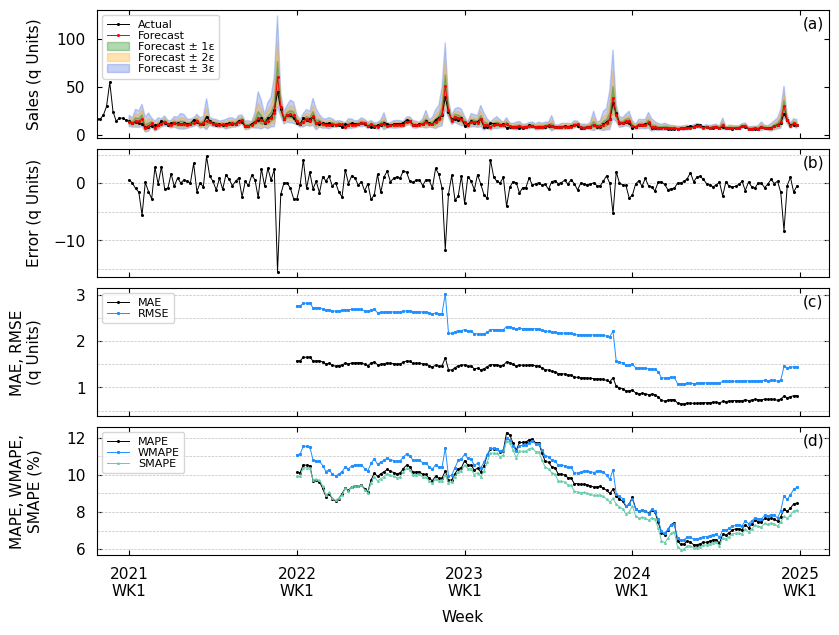

In [18]:
# plot forecasting results

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(24/2.54, 18/2.54), sharex=True)
fig.subplots_adjust(wspace=0.08, hspace=0.08)

xticks_index = np.where(week_id[:, 1] == 1)[0]  # index for xticks (WK1)
xticks_label = [f"{year}\nWK1" for year in range(year_first, year_last + 1)]
xlim = (week_first_pred + tau - 10, index_data_last + 10)

ax = axs[0] # plot sales forecast

def fill_prediction_interval(x_range, upper, lower, color, label): 
    upper = np.nan_to_num(upper, nan=0.0)
    lower = np.nan_to_num(lower, nan=0.0)
    ax.fill(
        np.append(x_range, x_range[::-1]),
        np.append(upper, lower[::-1]),
        color=color,
        alpha=0.3,
        label=label
    )

ax.tick_params(which='both', direction='in', pad=8, bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.tick_params(labelbottom=False)
ax.set_ylabel('Sales (q Units)', labelpad=8, fontsize=11)

ax.set_xticks(xticks_index)
ax.set_xticklabels(xticks_label)

ax.set_xlim(*xlim)

x_range = np.arange(week_first_pred + tau, week_last_pred + tau + 1)
fill_prediction_interval(x_range, sales_prediction_upper3[x_range], sales_prediction_lower3[x_range], 'royalblue', 'Forecast ± 3ε')
fill_prediction_interval(x_range, sales_prediction_upper2[x_range], sales_prediction_lower2[x_range], 'orange', 'Forecast ± 2ε')
fill_prediction_interval(x_range, sales_prediction_upper1[x_range], sales_prediction_lower1[x_range], 'green', 'Forecast ± 1ε')

ax.plot(sales, '-', linewidth=0.7, marker='o', markersize=1.2, color='black', label='Actual')
ax.plot(sales_prediction, '-', linewidth=0.7, marker='o', markersize=1.2, color='red', label='Forecast')

handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[i] for i in [3, 4, 2, 1, 0]], [labels[i] for i in [3, 4, 2, 1, 0]], loc='upper left', fontsize=8, labelspacing=0.1)

ax = axs[1] # plot errors

ax.tick_params(which='both', direction='in', pad=8, bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.tick_params(labelbottom=False)
ax.set_ylabel('Error (q Units)', labelpad=8, fontsize=11)

ax.set_xticks(xticks_index)
ax.set_xticklabels(xticks_label)

ax.set_xlim(*xlim)

for y in [5, 0, -5, -10, -15]:
    ax.axhline(y=y, linestyle='--', linewidth=0.5, color='silver')
ax.plot(err, '-', linewidth=0.7, marker='o', markersize=1.2, color='black', label='Error')

ax = axs[2] # plot mae, rmse

ax.tick_params(which='both', direction='in', pad=8, bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.tick_params(labelbottom=False)
ax.set_ylabel('MAE, RMSE\n(q Units)', labelpad=8, fontsize=11)

ax.set_xticks(xticks_index)
ax.set_xticklabels(xticks_label)

ax.set_xlim(*xlim)

for y in [0.5, 1, 1.5, 2, 2.5, 3]:
    ax.axhline(y=y, linestyle='--', linewidth=0.5, color='silver')
ax.plot(mae, '-', linewidth=0.7, marker='o', markersize=1.2, color='black', label='MAE')
ax.plot(rmse, '-', linewidth=0.7, marker='s', markersize=1.2, color='dodgerblue', label='RMSE')
ax.legend(loc='upper left', fontsize=8, labelspacing=0.1)

ax = axs[3] # plot mape, wmape, smape

ax.tick_params(which='both', direction='in', pad=8, bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.set_xlabel('Week', labelpad=8, fontsize=11)
ax.set_ylabel('MAPE, WMAPE,\nSMAPE (%)', labelpad=8, fontsize=11)

ax.set_xticks(xticks_index)
ax.set_xticklabels(xticks_label)

ax.set_xlim(*xlim)

for y in range(6, 13):
    ax.axhline(y=y, linestyle='--', linewidth=0.5, color='silver')
ax.plot(mape * 100, '-', linewidth=0.7, marker='o', markersize=1.2, color='black', label='MAPE')
ax.plot(wmape * 100, '-', linewidth=0.7, marker='s', markersize=1.2, color='dodgerblue', label='WMAPE')
ax.plot(smape * 100, '-', linewidth=0.7, marker='^', markersize=1.2, color='mediumaquamarine', label='SMAPE')
ax.legend(loc='upper left', fontsize=8, labelspacing=0.1)

fig.align_ylabels(axs)

for i, ax in enumerate(axs):
    label = f'({chr(97 + i)})' # 97 is 'a' in ASCII
    ax.text(
        0.964, 0.95, label,
        transform=ax.transAxes,
        fontsize=11,
        va='top', ha='left'
    )

In [19]:
# print averages of accuracy metrics

metrics = {
    'MAE': mae,
    'RMSE': rmse,
    'MAPE': mape,
    'WMAPE': wmape,
    'SMAPE': smape
}

for name, values in metrics.items():
    mean_val = np.nanmean(values)
    std_val = np.nanstd(values, ddof=1)
    print(f"<{name}>: {np.format_float_positional(mean_val, precision=4)} "
          f"({np.format_float_positional(std_val, precision=4)})")

<MAE>: 1.1938 (0.3496)
<RMSE>: 1.9912 (0.6141)
<MAPE>: 0.0914 (0.0158)
<WMAPE>: 0.0959 (0.0166)
<SMAPE>: 0.0888 (0.0157)
